# Data Analysis

## 0. Recap Data

In [1]:
import nilearn
from nilearn import datasets
import pandas as pd
from glob import glob
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

In [4]:
# Load the open data set ADHD 200 from nilearn
data = nilearn.datasets.fetch_adhd(n_subjects=40, data_dir='/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data', url=None, resume=True, verbose=1)

In [5]:
data['func'][0]

'/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz'

In [6]:
data.keys()

dict_keys(['func', 'confounds', 'phenotypic', 'description'])

In [7]:
data['confounds'][0]

'/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0010042/0010042_regressors.csv'

## 1. Extracting time series

In [8]:
# set variables
rest_files = data['func'][0]
confound_files = data['confounds'][0]

In [11]:
# Get Yeo atlas
atlas_yeo = datasets.fetch_atlas_yeo_2011(data_dir='/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/yeo_atlas')

In [12]:
# set atlas
atlas_file = atlas_yeo.thick_7

In [13]:
# define masker for time series extraction
masker = NiftiLabelsMasker(labels_img=atlas_file, standardize=True, memory='nilearn_cache')

In [14]:
# apply masker to extract time series
time_series = masker.fit_transform(rest_files, confounds=confound_files)

In [15]:
# evaluate time series
time_series.shape

(176, 7)

In [16]:
# nilearn connectivity expects/wants time series stacked across participants (participants x time points x regions)
# thus, we have to reshape our time series to introduce a respective new dimension 
time_series = time_series.reshape(1,176,7)
time_series

array([[[-0.51034445, -0.29479277, -1.6705873 , ...,  0.28058898,
         -0.71294105,  0.22904894],
        [ 0.9958635 , -0.3302702 , -0.40546834, ..., -0.90956265,
         -0.2500286 , -0.2580618 ],
        [ 1.7991178 , -2.5736818 ,  0.18031912, ..., -0.574182  ,
         -0.01597627, -0.85473424],
        ...,
        [ 0.7255313 , -1.2795805 ,  0.43343168, ..., -0.40040085,
          0.865115  ,  0.51268786],
        [ 2.5853388 , -1.439889  ,  1.5045828 , ..., -1.1568449 ,
          1.2774026 , -0.49751338],
        [ 2.8541226 , -1.6701623 ,  0.60753673, ..., -0.2558145 ,
         -0.25552046, -1.1211945 ]]], dtype=float32)

## 2. Compute and display correlation matrix

In [17]:
# setup and apply connectivity measure to compute connectivity of regions across time points
connectome_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = connectome_measure.fit_transform(time_series)

In [18]:
# correlation matrix of course still has the extra dimension
correlation_matrices.shape

(1, 7, 7)

In [19]:
# as we work with data of one participant right now, lets just drop it
correlation_matrices = correlation_matrices.squeeze()
correlation_matrices.shape

(7, 7)

In [20]:
correlation_matrices

array([[ 1.        , -0.5145971 ,  0.16595417, -0.4575826 , -0.15901949,
        -0.32257894, -0.16459793],
       [-0.5145971 ,  1.        , -0.15548664,  0.64208764,  0.10796294,
         0.07630513, -0.19502069],
       [ 0.16595417, -0.15548664,  1.        , -0.11649854, -0.01312734,
         0.06357163, -0.29489803],
       [-0.4575826 ,  0.64208764, -0.11649854,  1.        ,  0.03280948,
         0.24299005, -0.45543557],
       [-0.15901949,  0.10796294, -0.01312734,  0.03280948,  1.        ,
        -0.04724521,  0.05450457],
       [-0.32257894,  0.07630513,  0.06357163,  0.24299005, -0.04724521,
         1.        , -0.07549269],
       [-0.16459793, -0.19502069, -0.29489803, -0.45543557,  0.05450457,
        -0.07549269,  1.        ]], dtype=float32)

In [21]:
# use nilearn to plot it
from nilearn.plotting import plot_matrix

In [22]:
# extract provided labels and make them ready for plotting
import pandas as pd
labels = pd.read_csv(atlas_yeo.colors_7, sep=' ')['Unnamed: 7'].to_numpy()

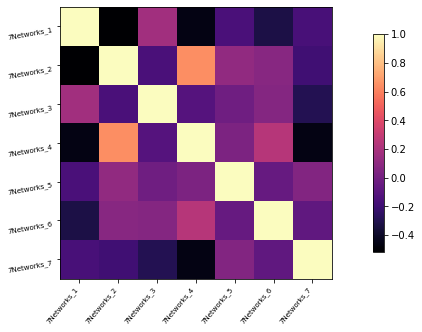

In [23]:
# plot connectivity matrix
plot_matrix(correlation_matrices, cmap='magma', labels=labels)

### tasks & next steps

- write a `loop` that applies the above steps for each `participant`
    - what should be changed adapted?
    - hint: the `nilearn` tutorial shared during the meeting basically has everything
- what do the `connectivity matrices` reflect? 
- how would the `connectivity matrices` be utilized within the `analyzes`?
    - can they be used "as-is"?
    - if not, what should be changed?